## Regression Metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split 

In [24]:
boston=load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0) 

### LinearRegression

In [5]:
from sklearn.linear_model import LinearRegression

In [9]:
boston_st_non = LinearRegression()
boston_st_non.fit(X_train, y_train)
np.append(boston_st_non.intercept_, boston_st_non.coef_)

array([ 3.69332555e+01, -1.17735289e-01,  4.40174969e-02, -5.76814314e-03,
        2.39341594e+00, -1.55894211e+01,  3.76896770e+00, -7.03517828e-03,
       -1.43495641e+00,  2.40081086e-01, -1.12972810e-02, -9.85546732e-01,
        8.44443453e-03, -4.99116797e-01])

In [10]:
print("R2 train: {:.2f}".format(boston_st_non.score(X_train, y_train))) 
print("R2 test: {:.2f}".format(boston_st_non.score(X_test, y_test)))

R2 train: 0.77
R2 test: 0.64


In [11]:
from sklearn.pipeline import make_pipeline
boston_st = make_pipeline( MinMaxScaler(), LinearRegression() )
boston_st.fit(X_train, y_train)
np.append(boston_st.named_steps['linearregression'].intercept_,
          boston_st.named_steps['linearregression'].coef_
           )

array([ 27.49272791, -10.47489456,   4.40174969,  -0.15735494,
         2.39341594,  -7.57645867,  19.67024242,  -0.68311581,
       -15.71607313,   5.52186497,  -5.91977522,  -9.26413928,
         3.34889385, -17.59386711])

In [12]:
print("R-квадрат обучение: {:.2f}".format(boston_st.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_st.score(X_test, y_test)))

R-квадрат обучение: 0.77
R-квадрат тест: 0.64


##### Adding Polynomial Features

In [13]:
def load_extended_boston():
    boston = load_boston()
    X = boston.data
    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
    return X, boston.target

In [39]:
X, y = boston.data, boston.target
X.shape

(506, 13)

In [40]:
X_ext,y_ext = load_extended_boston()
X_ext.shape

(506, 104)

In [41]:
boston_ex = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          LinearRegression() 
                         )
boston_ex.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [42]:
print("R-квадрат обучение: {:.2f}".format(boston_ex.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_ex.score(X_test, y_test)))

R-квадрат обучение: 0.95
R-квадрат тест: 0.61


### Ridge

In [43]:
from sklearn.linear_model import Ridge

In [44]:
boston_ridge_non = make_pipeline(
                             PolynomialFeatures(degree=2, include_bias=False), 
                             Ridge() 
                            )
boston_ridge_non.fit(X_train, y_train) # без Scaler штафы за евклидово расстояние

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [45]:
print("R-квадрат обучение: {:.2f}".format(boston_ridge_non.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_ridge_non.score(X_test, y_test)))

R-квадрат обучение: 0.95
R-квадрат тест: 0.61


In [46]:
boston_ridge = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Ridge() 
                         )
boston_ridge.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [92]:
np.abs(boston_ridge.named_steps['ridge'].coef_) > 0.1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [47]:
print("R-квадрат обучение: {:.2f}".format(boston_ridge.score(X_train, y_train))) 
print("R-квадрат тест: {:.2f}".format(boston_ridge.score(X_test, y_test)))

R-квадрат обучение: 0.89
R-квадрат тест: 0.75


In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold 

In [51]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
param_grid =[
    {'ridge__alpha':[0.01,0.05,0.1,0.25,0.5,1,2,4,6,8,10]}
     ]
grid = GridSearchCV(boston_ridge, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'ridge__alpha': [0.01, 0.05, 0.1, 0.25, 0.5, 1, 2, 4, 6, 8, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [52]:
print("Best parameters: {}\n".format(grid.best_params_))
print("Best train R2: {:.6f}\n".format(grid.best_score_)) 
print("Test R2: {:.6f}\n".format(grid.score(X_test, y_test)))

Best parameters: {'ridge__alpha': 0.05}

Best train R2: 0.870571

Test R2: 0.761432



#### [Plotting Learning Curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [53]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

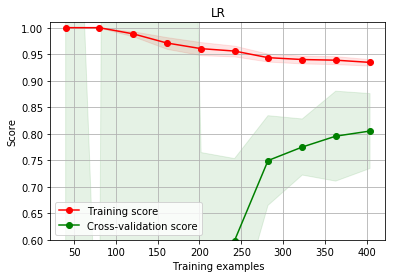

In [56]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
boston_ex = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          LinearRegression()                          )
boston_ex.fit(X, y)
estimator = boston_ex
plot_learning_curve(estimator, "LR", X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=-1);

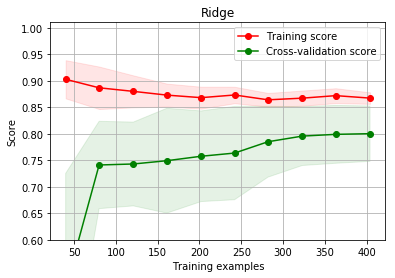

In [57]:
boston_ridge = make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Ridge()                          )
boston_ridge.fit(X, y)
estimator = boston_ridge
plot_learning_curve(estimator, "Ridge", X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=-1)
plt.show()

### Lasso

In [68]:
from sklearn.linear_model import Lasso

In [69]:
boston_lasso=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Lasso()                          )
boston_lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [74]:
boston_lasso.named_steps['lasso'].coef_ 

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -6.46818465, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [73]:
np.sum(boston_lasso.named_steps['lasso'].coef_ != 0)

4

In [71]:
print("R2 train: {:.2f}".format(boston_lasso.score(X_train, y_train))) 
print("R2 test: {:.2f}".format(boston_lasso.score(X_test, y_test))) 

R2 train: 0.31
R2 test: 0.23


In [96]:
boston_lasso=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Lasso(alpha=0.01, max_iter=100000) 
                         )
boston_lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('lasso', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [98]:
boston_lasso.named_steps['lasso'].coef_ 

array([ -0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,   0.        ,  -0.        ,  -1.45424134,
        11.08190153,   0.        ,   0.        ,   0.        ,
        -1.3266586 ,  -0.        ,  -0.        ,  -0.        ,
         0.        ,  -0.        ,  -0.        ,  -0.        ,
        -0.        ,  -8.732056  ,  -0.        ,  -0.        ,
        -0.        ,  -0.        ,   2.12359023,  -0.        ,
         0.        ,  -0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,  -3.73458542,
         0.        ,   6.37481748,  -0.        ,  -0.        ,
        -0.        ,   0.        ,  -4.38292961,  -2.14548209,
         3.75192689,  -0.        ,   4.3189796 ,   0.        ,
         0.        ,   0.23877447,  -0.        ,  -1.14091169,
        -4.30262518,  -0.        ,  -0.        ,  -2.19

In [99]:
np.sum(boston_lasso.named_steps['lasso'].coef_ != 0)

33

In [97]:
print("R-квадрат на обучающем наборе: {:.2f}".format(boston_lasso.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(boston_lasso.score(X_test, y_test))) 

R-квадрат на обучающем наборе: 0.90
R-квадрат на тестовом наборе: 0.77


In [101]:
boston_lasso=make_pipeline(MinMaxScaler(),
                          PolynomialFeatures(degree=2, include_bias=False), 
                          Lasso(alpha=0.0001, max_iter=100000) 
                         )
boston_lasso.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('lasso', Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [103]:
boston_lasso.named_steps['lasso'].coef_ 

array([-0.00000000e+00, -2.21225412e+01, -8.48922029e+01, -8.88313980e+00,
       -3.19145355e+00,  3.80493613e+01,  4.79633027e+01, -3.76659978e+01,
        2.77836086e+01,  0.00000000e+00, -8.02500060e-01,  2.49182919e+00,
       -1.07995134e+01,  1.00676871e+01,  0.00000000e+00,  0.00000000e+00,
        1.13239005e+02, -1.68282276e+01,  2.78498280e+01, -3.05358539e+01,
        0.00000000e+00, -1.01573529e+01, -0.00000000e+00, -0.00000000e+00,
       -4.02665153e-01,  2.96291105e+01, -8.18054467e+00, -1.41784665e+01,
       -2.24649318e+00, -5.24583092e+01,  7.06863596e+00,  2.50986861e+00,
       -7.17838177e+00, -2.93581679e+00,  2.58571812e+01, -5.14844625e+00,
        3.31634588e+01, -1.23658836e+01,  3.03634644e+01, -1.08568191e+00,
        1.82637230e+01,  4.76149478e+01,  1.24810660e+01,  4.16692692e+01,
       -0.00000000e+00,  1.97295385e+01, -7.41461126e+00,  1.95527056e+01,
       -1.25792008e+01, -1.53023130e+01, -1.65779934e+01, -3.12428948e+01,
        8.10944877e+00, -

In [104]:
np.sum(boston_lasso.named_steps['lasso'].coef_ != 0)

96

In [102]:
print("R-квадрат на обучающем наборе: {:.2f}".format(boston_lasso.score(X_train, y_train))) 
print("R-квадрат на тестовом наборе: {:.2f}".format(boston_lasso.score(X_test, y_test))) 

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.64
